# Get Tweets from Elon Musk and analyse for Sentiment

### Import Token

In [1]:
# Import Twitter API Token
import logging
import sys
sys.path.append('../../')
from config import create_api

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
api = create_api("auth1")

INFO:root:API created


### Import libraries

In [2]:
import tweepy
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

### Get 10 Tweets from Elon Musk as a Test

In [4]:
# Get the tweets and store as variable
posts = api.user_timeline(screen_name="elonmusk", count=100,tweet_mode = "extended")

# Print 5 tweets
print("Show 5 tweets from Elon Musk")

i=1
for tweet in posts[0:10]:
    print(str(i) + ') '+tweet.full_text + '\n')
    i+=1

Show 5 tweets from Elon Musk
1) @JohnnaCrider1 Ok

2) @harsimranbansal Canada requires charging by the minute vs kWh. We’re working to get that changed.

3) @harsimranbansal Will find out. Our aspiration is just to make a modest return vs the fully-considered price of Supercharging.

4) @JimPethokoukis Good point. SpaceX &amp; Tesla would probably have died, since both narrowly escaped bankruptcy in 2008.

5) Sustainable energy generation from sun &amp; wind is making great progress! https://t.co/hL6gp6SVQX

6) @Free_Space @thesheetztweetz @AviationWeek SpaceX will do the right thing for OneWeb, even though they are a competitor

7) @TeslaOwnersUK FSD Beta should be available in Europe for LHD this summer, RHD a few months later. These dates depend on regulatory approval.

8) @Teslarati @ResidentSponge I mean we’re basically identical – a few differences maybe …

9) @SawyerMerritt The UAW stole millions from workers, whereas Tesla has made many workers millionaires (via stock grants). 

In [5]:
# Create Dataframe with Tweets as Column
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
print(len(df))
# Show first 5 rows of data
df.head()


100


,Tweets
0,@JohnnaCrider1 Ok
1,@harsimranbansal Canada requires charging by t...
2,@harsimranbansal Will find out. Our aspiration...
3,@JimPethokoukis Good point. SpaceX &amp; Tesla...
4,Sustainable energy generation from sun &amp; w...


In [6]:
# Cleaning the text
# r tells python that it is a raw stream (regex)
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removes @mentions
    text = re.sub(r'#','',text) #removes # 
    text = re.sub(r'RT[\s]+','',text) #removes retweets
    text = re.sub(r'https?:\/\/\S+','',text) #removes hyperlink, the '?' matches 0 or 1 reps of the preceding 's'
    return text

# Calling the function
df['Tweets'] = df['Tweets'].apply(cleanTxt)
print(len(df))
# Show the cleaned text
df

100


,Tweets
0,Ok
1,Canada requires charging by the minute vs kWh...
2,Will find out. Our aspiration is just to make...
3,Good point. SpaceX &amp; Tesla would probably...
4,Sustainable energy generation from sun &amp; w...
...,...
95,Also the heaviest Falcon 9 payload at 16.25 me...
96,
97,: This is the first time a Falcon 9 first stag...
98,As it ends the cycle of retribution


# Get Sentiment

In [7]:

# Function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get polarity (how positiv or negative)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two more columns in Dataframe
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new Dataframe
df

,Tweets,Subjectivity,Polarity
0,Ok,0.500000,0.500000
1,Canada requires charging by the minute vs kWh...,0.000000,0.000000
2,Will find out. Our aspiration is just to make...,0.900000,0.100000
3,Good point. SpaceX &amp; Tesla would probably...,0.500000,0.250000
4,Sustainable energy generation from sun &amp; w...,0.750000,1.000000
...,...,...,...
95,Also the heaviest Falcon 9 payload at 16.25 me...,0.000000,0.000000
96,,0.000000,0.000000
97,: This is the first time a Falcon 9 first stag...,0.333333,0.281250
98,As it ends the cycle of retribution,0.000000,0.000000


# Wordcloud

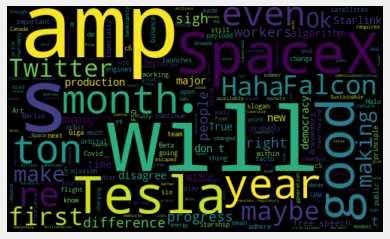

In [8]:
all_words = ' '.join([tweets for tweets in df['Tweets']])
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# sort sentiment into analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis of Polarity'] = df['Polarity'].apply(getAnalysis)
print(len(df))
df

100


,Tweets,Subjectivity,Polarity,Analysis of Polarity
0,Ok,0.500000,0.500000,Positive
1,Canada requires charging by the minute vs kWh...,0.000000,0.000000,Neutral
2,Will find out. Our aspiration is just to make...,0.900000,0.100000,Positive
3,Good point. SpaceX &amp; Tesla would probably...,0.500000,0.250000,Positive
4,Sustainable energy generation from sun &amp; w...,0.750000,1.000000,Positive
...,...,...,...,...
95,Also the heaviest Falcon 9 payload at 16.25 me...,0.000000,0.000000,Neutral
96,,0.000000,0.000000,Neutral
97,: This is the first time a Falcon 9 first stag...,0.333333,0.281250,Positive
98,As it ends the cycle of retribution,0.000000,0.000000,Neutral


In [10]:
# Print only positive tweets
sorted_DF = df.sort_values(by=['Polarity'])

for i in range(0,sorted_DF.shape[0]):
    if(sorted_DF['Analysis of Polarity'][i] == 'Positive'):
        print(str(i)+') ' +sorted_DF['Tweets'][i])
        print()

0)  Ok

2)  Will find out. Our aspiration is just to make a modest return vs the fully-considered price of Supercharging.

3)  Good point. SpaceX &amp; Tesla would probably have died, since both narrowly escaped bankruptcy in 2008.

4) Sustainable energy generation from sun &amp; wind is making great progress! 

5) _Space   SpaceX will do the right thing for OneWeb, even though they are a competitor

6)  FSD Beta should be available in Europe for LHD this summer, RHD a few months later. These dates depend on regulatory approval.

8)  The UAW stole millions from workers, whereas Tesla has made many workers millionaires (via stock grants). Subtle, but important difference.

9)  UAW slogan – “Fighting for the right to embezzle money from auto workers!”

12)    Original Halo &amp; Smash Bros, but thumb joysticks give me the willies

13)    Some people use meditation or yoga to calm their mind at the end of the day, but video games on hardcore mode work best for me

14)    I suppose it woul

In [11]:
print(df.shape)

(100, 4)


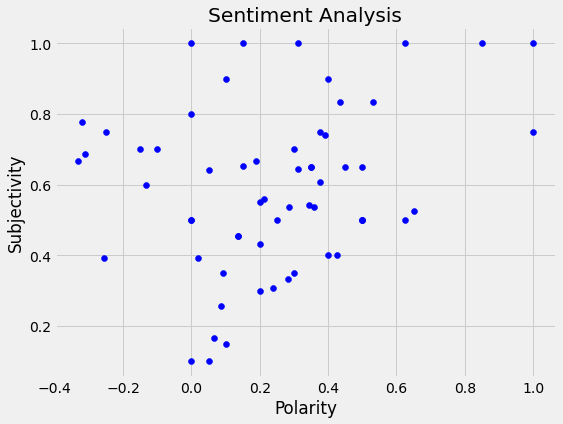

In [12]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
# Get the percentage of positive & negative tweets
pos_tweets = df[df["Analysis of Polarity"] == "Positive"]
neg_tweets = df[df["Analysis of Polarity"] == "Negative"]
neutral_tweets = df[df["Analysis of Polarity"] == "Neutral"]

pos_tweets = pos_tweets['Tweets']
neg_tweets = neg_tweets['Tweets']
neutral_tweets = neutral_tweets['Tweets']

print(str(round((pos_tweets.shape[0] / df.shape[0]) * 100,1))+"% positive Tweets")
print(str(round((neg_tweets.shape[0] / df.shape[0]) * 100,1))+"% negative Tweets")
print(str(round((neutral_tweets.shape[0] / df.shape[0]) * 100,1))+"% neutral Tweets")

48.0% positive Tweets
8.0% negative Tweets
44.0% neutral Tweets


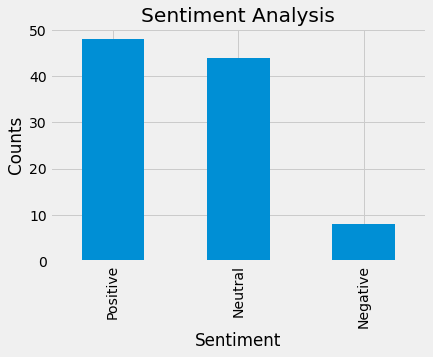

In [14]:
# Show percentage as diagram

df['Analysis of Polarity'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis of Polarity"].value_counts().plot(kind="bar")
plt.show()